# Machine Learning Introduction: Handwritten Digits

In [6]:
import sklearn
from sklearn import (linear_model, datasets, metrics)
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

In [7]:
#Gathering Dataset
digits = datasets.load_digits()

data = digits.data
image_label = digits.target
real_digit = digits.target_names

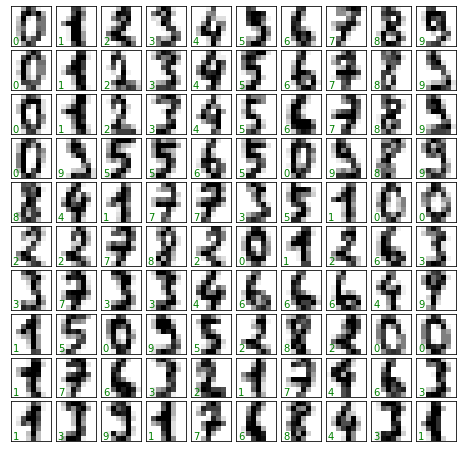

In [8]:
#Visualizing Dataset with true labels

fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(image_label[i]), c='green', transform=ax.transAxes)
    ax.set_xticks([])
    ax.set_yticks([])

Before embedding shape was: (1797, 64)
After embedding shape is: (1797, 2)



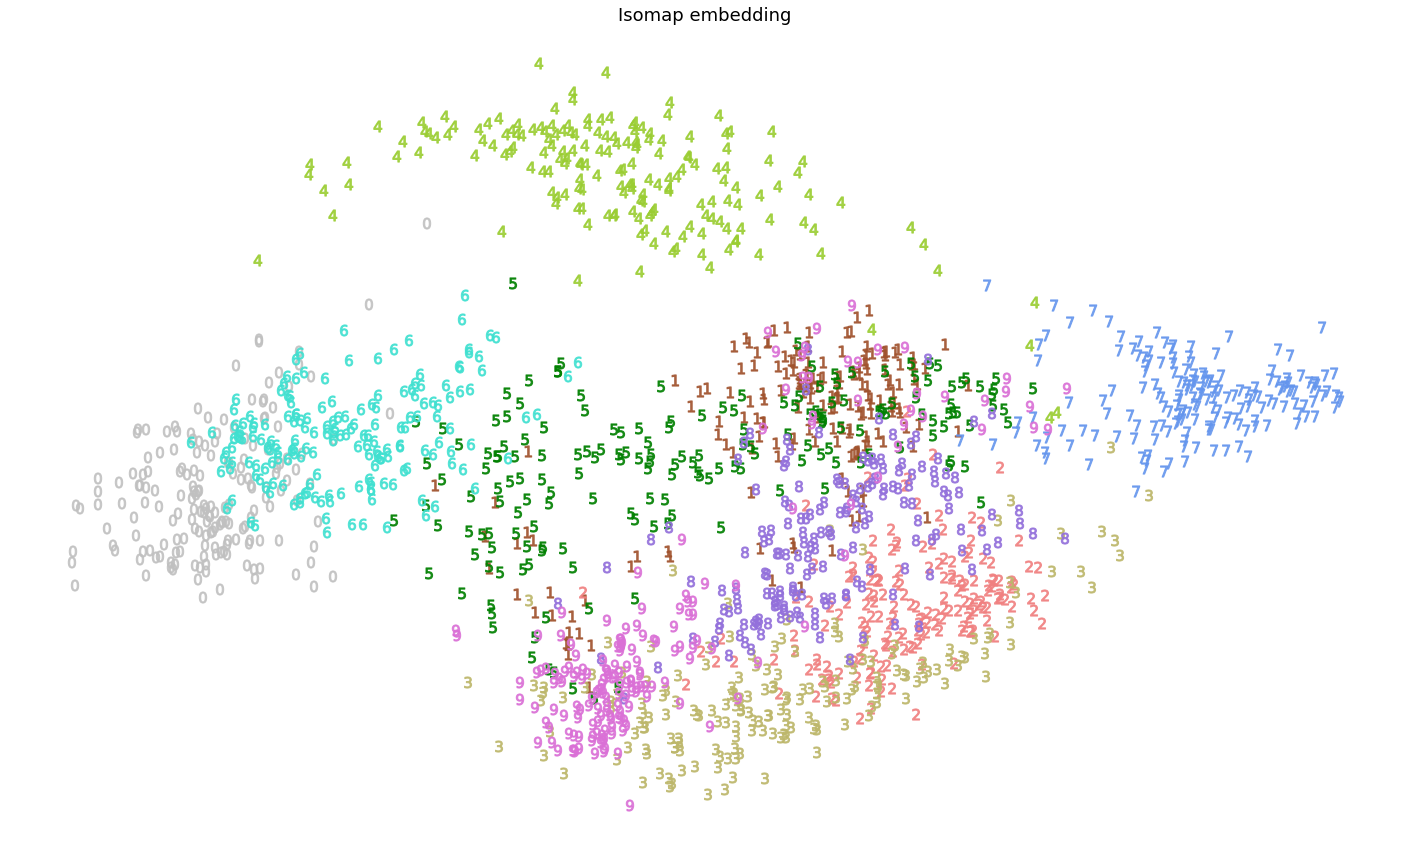

In [9]:
#Dimensionality reduction with Isomap -> Unsupervised Learning!

#Assigning a model
embedding = Isomap(n_neighbors=20, n_components=2)

#Fitting and reducing dimensionality
reduced_data = embedding.fit_transform(data)
print('Before embedding shape was: {}\nAfter embedding shape is: {}\n'.format(data.shape, reduced_data.shape))

#Plotting
fig, ax = plt.subplots(figsize=(25,15))

plt.set_cmap('plasma')
colors = ['silver', 'sienna', 'lightcoral', 'darkkhaki', 'yellowgreen', 'green', 'turquoise', 'cornflowerblue', 'mediumpurple', 'orchid']
for i, digit in enumerate(real_digit):

    ax.scatter(
        reduced_data[image_label == digit][:, 0],
        reduced_data[image_label == digit][:, 1],
        marker=f'${digit}$',
        s=125,
        alpha=0.85,
        c=colors[i]
    )

ax.set_title('Isomap embedding', fontsize=18)
ax.set_axis_off()
plt.show()

Accuracy on classification is: 0.9451


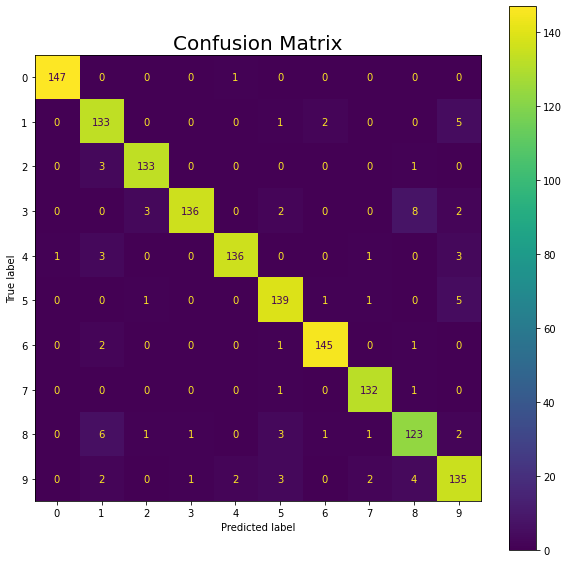

In [10]:
#Classification with linear regression -> Supervised Learning

#Assigning a model
model = linear_model.LogisticRegression(solver='sag', max_iter=2000)

#Split data into training and test subsets with a test size of 80%
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, digits.target, test_size=0.8)

#Train the model with the digits on the training subset
model.fit(X_train, y_train)

#Predict the value of the digit on the test subset -> Prediction comes from trained model!
y_predicted = model.predict(X_test)

#Accuracy score -> The two dimensionalities must match!
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print('Accuracy on classification is: {:.4f}'.format(accuracy))

#Computing the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_predicted)

#Pretty plotting
fig, ax = plt.subplots(figsize=(10, 10))
display = metrics.ConfusionMatrixDisplay(conf_matrix).plot(ax=ax)
display.ax_.set_title('Confusion Matrix', fontsize=20)
plt.show()